In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv(r'D:\Programming\Data Science\dataset\linear_regression_practice.csv')
dataset.head()

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Dell\AppData\Local\Temp\ipykernel_8348\2615816033.py:1: SyntaxWarning: invalid escape sequence '\P'
  dataset = pd.read_csv('D:\Programming\Data Science\dataset\linear_regression_practice.csv')


,Study_Hours,Sleep_Hours,Attendance_%,Exam_Score
0,5.99,5.58,91.79,82.89
1,4.72,6.58,92.80,80.38
2,6.30,6.66,95.42,96.24
3,8.05,6.20,95.27,100.00
4,4.53,6.84,83.11,77.79


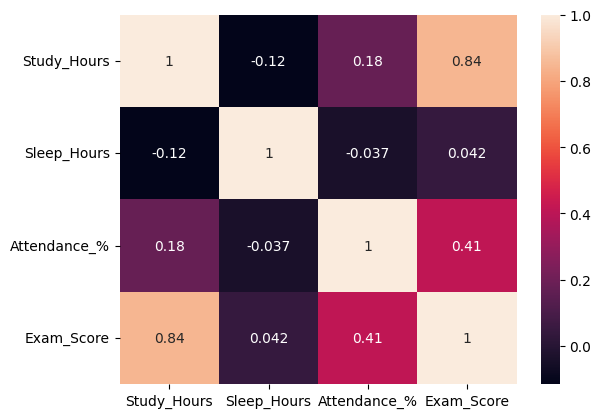

In [4]:
sns.heatmap(data=dataset.corr(), annot=True)
plt.show()

In [5]:
x = dataset.iloc[:,:-1]
y = dataset['Exam_Score']

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
se = StandardScaler()
se.fit(x)

,copy,True
,with_mean,True
,with_std,True


In [8]:
x = pd.DataFrame(se.transform(x), columns=x.columns) 


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [12]:
lr = LinearRegression()
lr.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
lr.score(x_test, y_test)*100

83.21200904593205

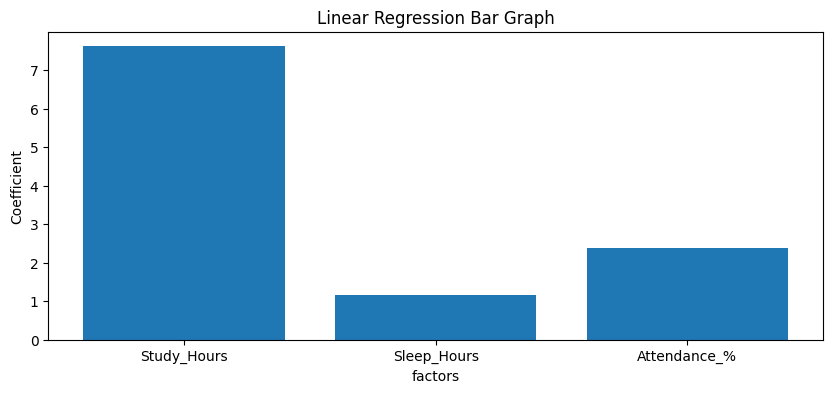

In [14]:
plt.figure(figsize=(10,4))
plt.title("Linear Regression Bar Graph")
plt.bar(x.columns, lr.coef_)
plt.xlabel("factors")
plt.ylabel("Coefficient")
plt.show()

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

In [16]:
mean_absolute_error(y_test,lr.predict(x_test))

2.9932127839588105

In [17]:
mean_squared_error(y_test,lr.predict(x_test))

12.178176517990428

In [18]:
root_mean_squared_error(y_test,lr.predict(x_test))

3.489724418631137

In [19]:
la = Lasso(alpha=0.2)
la.fit(x_train, y_train)

,alpha,0.2
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [20]:
la.score(x_test, y_test)*100

82.08185395057173

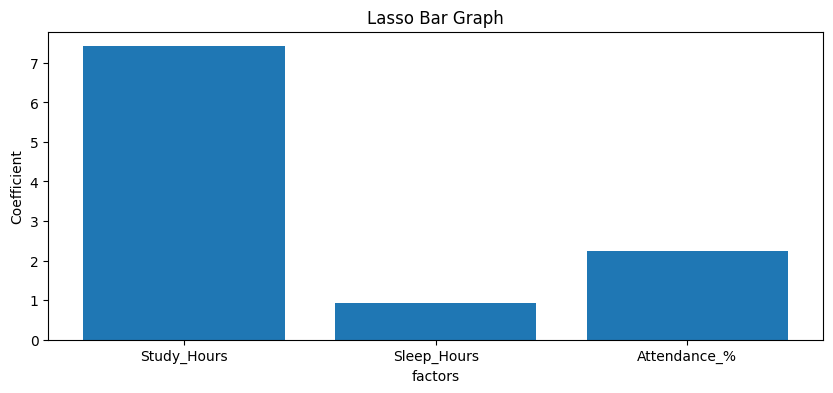

In [21]:
plt.figure(figsize=(10,4))
plt.title("Lasso Bar Graph")
plt.bar(x.columns, la.coef_)
plt.xlabel("factors")
plt.ylabel("Coefficient")
plt.show()

In [22]:
mean_absolute_error(y_test,la.predict(x_test))

3.0943530313686187

In [23]:
mean_squared_error(y_test,la.predict(x_test))

12.998002325715762

In [24]:
root_mean_squared_error(y_test,la.predict(x_test))

3.6052742372412894

In [25]:
ri = Ridge(alpha=10)
ri.fit(x_train,y_train)

,alpha,10
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [26]:
ri.score(x_test,y_test)*100

80.90698461771763

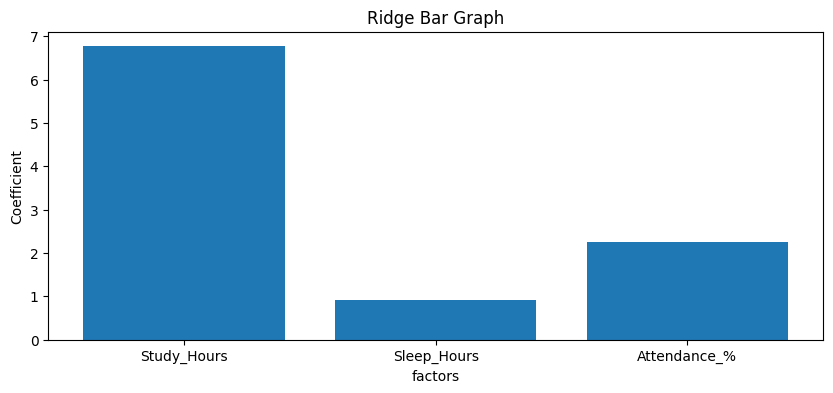

In [27]:
plt.figure(figsize=(10,4))
plt.title("Ridge Bar Graph")
plt.bar(x.columns, ri.coef_)
plt.xlabel("factors")
plt.ylabel("Coefficient")
plt.show()

In [28]:
mean_absolute_error(y_test,ri.predict(x_test))

3.11496701812415

In [29]:
mean_squared_error(y_test,ri.predict(x_test))

13.850264288461455

In [30]:
root_mean_squared_error(y_test,ri.predict(x_test))

3.7215943207799334

In [31]:
df = pd.DataFrame({"Factors": x.columns, "Linear Regression": lr.coef_, "Lasso Regularization": la.coef_, "Ridge Regularization": ri.coef_})
df

,Factors,Linear Regression,Lasso Regularization,Ridge Regularization
0,Study_Hours,7.617232,7.421167,6.767894
1,Sleep_Hours,1.152914,0.917833,0.904101
2,Attendance_%,2.384163,2.241259,2.242259


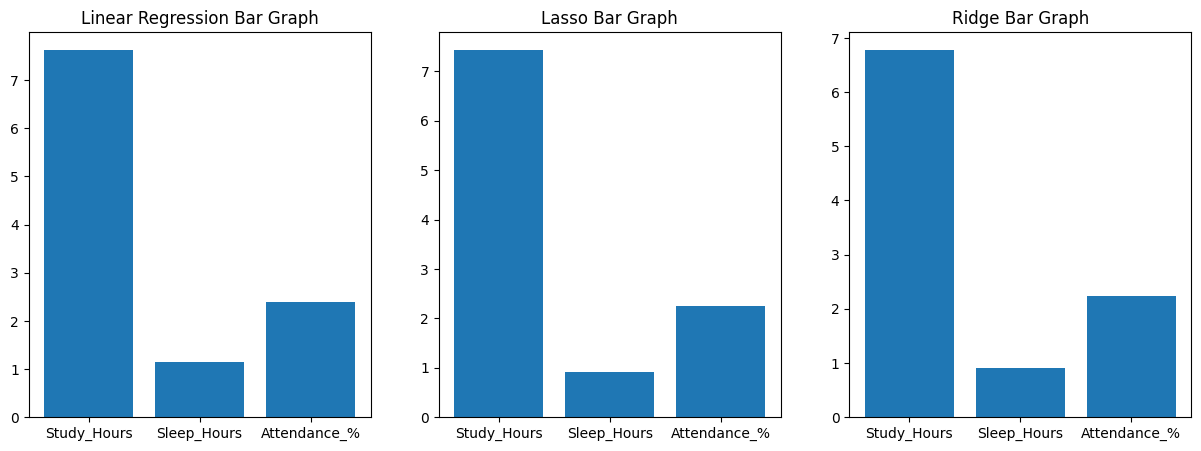

In [34]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Linear Regression Bar Graph")
plt.bar(x.columns, lr.coef_)

plt.subplot(1, 3, 2)
plt.title("Lasso Bar Graph")
plt.bar(x.columns, la.coef_)

plt.subplot(1, 3, 3)
plt.title("Ridge Bar Graph")
plt.bar(x.columns, ri.coef_)

plt.show()